In [1]:
from __future__ import print_function
import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
import argparse
from torchvision import datasets,transforms
from torch.utils.data import Dataset, DataLoader,random_split
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(256, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 256)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return  F.log_softmax(x, dim=1)
    


In [3]:
def train(model,device,optimizer,train_loader,epoch):
    model.train()
    for batch_idx,(target,data) in enumerate(train_loader):
        data,target=data.to(device,dtype=torch.float),target.to(device)
        optimizer.zero_grad()
        output=model(data)
        loss=F.nll_loss(output,target)
        loss.backward()
        optimizer.step()
        if batch_idx % 10 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
            100. * batch_idx / len(train_loader), loss.item()))

In [4]:
def test(model,device,optimizer,test_loader,epoch):
    model.eval()
    test_loss=0
    correct=0
    with torch.no_grad():
        for target, data in test_loader:
            
            data,target=data.to(device,dtype=torch.float),target.to(device)
            output = model(data)
            output.shape
            test_loss += F.nll_loss(output, target, reduction='sum').item() # sum up batch loss
            pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

In [5]:
class MnistDataSet(Dataset):
    def __init__(self,csv_file,train=True,transform=None):
        self.lastindx=33600
        self.fstindx=1
        if not train:
            self.lastindx=41999
            self.fstindx=33601
        self.images=pd.read_csv(csv_file)
        self.data=self.images.iloc[self.fstindx:self.lastindx,1:]
        self.labels=self.images.iloc[self.fstindx:self.lastindx,0].values
        self.transform=transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self,idx):
        imgs=self.data.iloc[idx,:].values/255
        
        return self.labels[idx],imgs.reshape(1,28,28)

In [7]:
traindata=MnistDataSet('train.csv')
testdata=MnistDataSet('train.csv',train=False)

In [9]:
use_cuda=True
kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [10]:
train_loader = torch.utils.data.DataLoader(traindata,batch_size=64, shuffle=True,**kwargs)
test_loader = torch.utils.data.DataLoader(testdata,batch_size=64, shuffle=True,**kwargs)

In [11]:
model=Net().to(device)
model=model.cuda()

In [12]:
optimizer=optim.SGD(model.parameters(),lr=0.005,momentum=0.5)

In [ ]:
for epoch in range(1,20):
    train(model,device,optimizer,train_loader,epoch)
    test(model,device,optimizer,test_loader,epoch)

Train Epoch: 1 [0/33599 (0%)]	Loss: 0.110704
Train Epoch: 1 [640/33599 (2%)]	Loss: 0.142092
Train Epoch: 1 [1280/33599 (4%)]	Loss: 0.325005
Train Epoch: 1 [1920/33599 (6%)]	Loss: 0.059389
Train Epoch: 1 [2560/33599 (8%)]	Loss: 0.052715
Train Epoch: 1 [3200/33599 (10%)]	Loss: 0.024800
Train Epoch: 1 [3840/33599 (11%)]	Loss: 0.049865
Train Epoch: 1 [4480/33599 (13%)]	Loss: 0.112536
Train Epoch: 1 [5120/33599 (15%)]	Loss: 0.010418
Train Epoch: 1 [5760/33599 (17%)]	Loss: 0.069467
Train Epoch: 1 [6400/33599 (19%)]	Loss: 0.034917
Train Epoch: 1 [7040/33599 (21%)]	Loss: 0.038100
Train Epoch: 1 [7680/33599 (23%)]	Loss: 0.302214
Train Epoch: 1 [8320/33599 (25%)]	Loss: 0.084725
Train Epoch: 1 [8960/33599 (27%)]	Loss: 0.038467
Train Epoch: 1 [9600/33599 (29%)]	Loss: 0.131919
Train Epoch: 1 [10240/33599 (30%)]	Loss: 0.023991
Train Epoch: 1 [10880/33599 (32%)]	Loss: 0.077730
Train Epoch: 1 [11520/33599 (34%)]	Loss: 0.066892
Train Epoch: 1 [12160/33599 (36%)]	Loss: 0.036830
Train Epoch: 1 [12800/335

Train Epoch: 4 [1920/33599 (6%)]	Loss: 0.094882
Train Epoch: 4 [2560/33599 (8%)]	Loss: 0.244039
Train Epoch: 4 [3200/33599 (10%)]	Loss: 0.044469
Train Epoch: 4 [3840/33599 (11%)]	Loss: 0.036531
Train Epoch: 4 [4480/33599 (13%)]	Loss: 0.141158
Train Epoch: 4 [5120/33599 (15%)]	Loss: 0.010452
Train Epoch: 4 [5760/33599 (17%)]	Loss: 0.064941
Train Epoch: 4 [6400/33599 (19%)]	Loss: 0.087034
Train Epoch: 4 [7040/33599 (21%)]	Loss: 0.056386
Train Epoch: 4 [7680/33599 (23%)]	Loss: 0.028495
Train Epoch: 4 [8320/33599 (25%)]	Loss: 0.014505
Train Epoch: 4 [8960/33599 (27%)]	Loss: 0.111900
Train Epoch: 4 [9600/33599 (29%)]	Loss: 0.038549
Train Epoch: 4 [10240/33599 (30%)]	Loss: 0.086355
Train Epoch: 4 [10880/33599 (32%)]	Loss: 0.008182
Train Epoch: 4 [11520/33599 (34%)]	Loss: 0.054240
Train Epoch: 4 [12160/33599 (36%)]	Loss: 0.020069
Train Epoch: 4 [12800/33599 (38%)]	Loss: 0.032888
Train Epoch: 4 [13440/33599 (40%)]	Loss: 0.065357
Train Epoch: 4 [14080/33599 (42%)]	Loss: 0.040872
Train Epoch: 4 

Train Epoch: 7 [3840/33599 (11%)]	Loss: 0.147505
Train Epoch: 7 [4480/33599 (13%)]	Loss: 0.026494
Train Epoch: 7 [5120/33599 (15%)]	Loss: 0.006327
Train Epoch: 7 [5760/33599 (17%)]	Loss: 0.039848
Train Epoch: 7 [6400/33599 (19%)]	Loss: 0.010156
Train Epoch: 7 [7040/33599 (21%)]	Loss: 0.021598
Train Epoch: 7 [7680/33599 (23%)]	Loss: 0.026269
Train Epoch: 7 [8320/33599 (25%)]	Loss: 0.045109
Train Epoch: 7 [8960/33599 (27%)]	Loss: 0.013266
Train Epoch: 7 [9600/33599 (29%)]	Loss: 0.024349
Train Epoch: 7 [10240/33599 (30%)]	Loss: 0.016220
Train Epoch: 7 [10880/33599 (32%)]	Loss: 0.010144
Train Epoch: 7 [11520/33599 (34%)]	Loss: 0.074547
Train Epoch: 7 [12160/33599 (36%)]	Loss: 0.018968
Train Epoch: 7 [12800/33599 (38%)]	Loss: 0.031676
Train Epoch: 7 [13440/33599 (40%)]	Loss: 0.056578
Train Epoch: 7 [14080/33599 (42%)]	Loss: 0.026375
Train Epoch: 7 [14720/33599 (44%)]	Loss: 0.046841
Train Epoch: 7 [15360/33599 (46%)]	Loss: 0.033798
Train Epoch: 7 [16000/33599 (48%)]	Loss: 0.031335
Train Epoc

Train Epoch: 10 [5760/33599 (17%)]	Loss: 0.089716
Train Epoch: 10 [6400/33599 (19%)]	Loss: 0.038911
Train Epoch: 10 [7040/33599 (21%)]	Loss: 0.069930
Train Epoch: 10 [7680/33599 (23%)]	Loss: 0.028952
Train Epoch: 10 [8320/33599 (25%)]	Loss: 0.131192
Train Epoch: 10 [8960/33599 (27%)]	Loss: 0.013628
Train Epoch: 10 [9600/33599 (29%)]	Loss: 0.053044
Train Epoch: 10 [10240/33599 (30%)]	Loss: 0.070264
Train Epoch: 10 [10880/33599 (32%)]	Loss: 0.008604
Train Epoch: 10 [11520/33599 (34%)]	Loss: 0.014168
Train Epoch: 10 [12160/33599 (36%)]	Loss: 0.017646


### Lets Visualize some predections 

tensor([5], device='cuda:0')


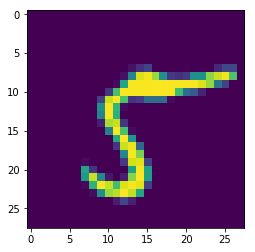

In [14]:
label,img=testdata[423]
output = model(torch.tensor(img).view(1,1,28,28).to(device,dtype=torch.float))
print(torch.argmax(output, dim=1))
plt.imshow(img.reshape(28,28))

In [21]:
import matplotlib.image as mpimg
testimgs=['9','2','5','7','6'] ## Manual input 
for i in testimgs:
    xtest=mpimg.imread('testimgs/'+i+'.jpg')
    #plt.imshow(xtest/255)
    print('Actuall: '+i,end='')
    xtest=xtest[:,:,0]
    xtest=xtest.reshape(1,1,28,28)
    output = model(torch.tensor(xtest).to(device,dtype=torch.float))
    
    print(' Predicted: ',end='')
    print(torch.argmax(output, dim=1))
    #|print(preds)



Actuall: 9 Predicted: tensor([6], device='cuda:0')
Actuall: 2 Predicted: tensor([2], device='cuda:0')
Actuall: 5 Predicted: tensor([6], device='cuda:0')
Actuall: 7 Predicted: tensor([2], device='cuda:0')
Actuall: 6 Predicted: tensor([8], device='cuda:0')
